In [1]:
%load_ext autoreload
%autoreload 2
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

# The design class `DesignPlanar` is best for 2D circuit designs.

design = designs.DesignPlanar()
gui = MetalGUI(design)

# Adjust the chip dimensions
design.chips.main.size['size_x'] = '5mm'
design.chips.main.size['size_y'] = '5mm'

design.variables['cpw_width'] = '10 um' #S from reference 2
design.variables['cpw_gap'] = '6 um' #W from reference 2

In [2]:
# Import the elements
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.line_tee import LineTee
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

# Be aware of the default_options that can be overridden by user.
#TransmonCross.get_template_options(design)
#RouteMeander.get_template_options(design)

RouteFramed.get_template_options(design)

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False}

In [3]:
#LaunchPads_Based on SQUILL 6-pin package design [Rotated by +90]
design.overwrite_enabled = True

lp1 = LaunchpadWirebond(design, 'LeftTopLP', options = Dict(pos_x = '-1.3mm', pos_y = '+2mm', trace_width='10um', 
                                                               trace_gap='6um', orientation='-90', pad_width='150um', pad_height='200um'))

lp2 = LaunchpadWirebond(design, 'RightTopLP', options = Dict(pos_x = '1.3mm', pos_y = '+2mm', trace_width='10um', 
                                                               trace_gap='6um', orientation='-90', pad_width='150um', pad_height='200um'))

lp2 = LaunchpadWirebond(design, 'LeftLP', options = Dict(pos_x = '-2mm', pos_y = '0mm', trace_width='10um', 
                                                               trace_gap='6um', orientation='0', pad_width='150um', pad_height='200um'))

lp3 = LaunchpadWirebond(design, 'RightLP', options = Dict(pos_x = '2mm', pos_y = '0mm', trace_width='10um', 
                                                               trace_gap='6um', orientation='180', pad_width='150um', pad_height='200um'))

lp4 = LaunchpadWirebond(design, 'LeftBotLP', options = Dict(pos_x = '-1.3mm', pos_y = '-2mm', trace_width='10um', 
                                                               trace_gap='6um', orientation='90', pad_width='150um', pad_height='200um'))

lp5 = LaunchpadWirebond(design, 'RightBotLP', options = Dict(pos_x = '1.3mm', pos_y = '-2mm', trace_width='10um', 
                                                               trace_gap='6um', orientation='90', pad_width='150um', pad_height='200um'))

In [4]:
RouteFramed.default_options

{'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width'}

04:18PM 02s WARNING [check_lengths]: For path table, component=RO1, key=trace has short segments that could cause issues with fillet. Values in (1-1) (6-6)  are index(es) in shapely geometry.
04:18PM 02s WARNING [check_lengths]: For path table, component=RO1, key=cut has short segments that could cause issues with fillet. Values in (1-1) (6-6)  are index(es) in shapely geometry.
04:18PM 02s WARNING [check_lengths]: For path table, component=RO2, key=trace has short segments that could cause issues with fillet. Values in (1-1) (8-8)  are index(es) in shapely geometry.
04:18PM 02s WARNING [check_lengths]: For path table, component=RO2, key=cut has short segments that could cause issues with fillet. Values in (1-1) (8-8)  are index(es) in shapely geometry.
04:18PM 02s WARNING [check_lengths]: For path table, component=RO3, key=trace has short segments that could cause issues with fillet. Values in (1-1) (8-8)  are index(es) in shapely geometry.
04:18PM 02s WARNING [check_lengths]: For pat

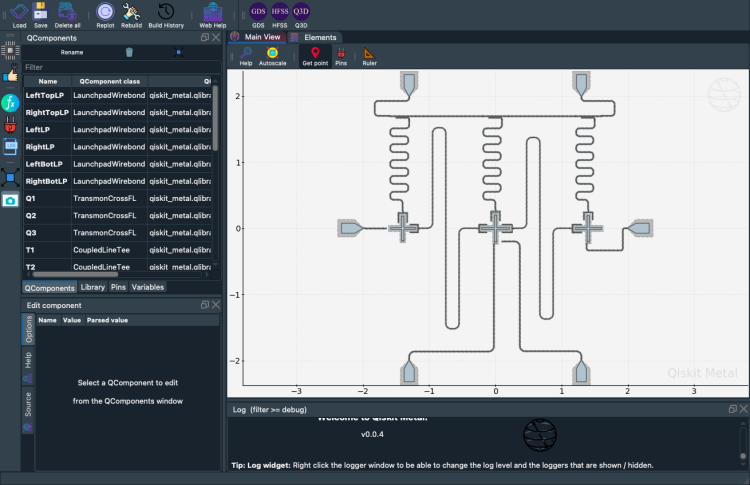

In [5]:
design.overwrite_enabled = True

# The connectord_type can be string of '0' for 'Claw' or '1' for 'Gap'
# to define which type of connector is used.

# The connector_location can be string of '0', '90', '180'  degrees which of the three arms where a given connector should be.
# South is for the junction.

xmon_options_1 = dict(chip='main', make_fl=False, cross_gap = '30um', cross_width = '30um', cross_length= '185um', 
    connection_pads=dict(
        dl1 = dict(connector_location = '0', connector_type = '1', ground_spacing='30um'),
        b1 = dict(connector_location = '180', connector_type = '0', claw_length = '115um', claw_width = '7um', claw_gap= '6um', ground_spacing='4um'),
        r1 = dict(connector_location = '90', connector_type = '0', claw_length = '140um', claw_width = '10um', claw_gap= '6um', ground_spacing='10um'), 
    
    ),
)

xmon_options_2 = dict(chip='main', make_fl=False, cross_gap = '30um', cross_width = '30um', cross_length= '205um', 
    connection_pads=dict(
        #dl2 = dict( connector_location = '180', connector_type = '1', ground_spacing='120um'),
        b2 = dict(connector_location = '-180', connector_type = '0', claw_length = '110um', claw_width = '7um', claw_gap= '6um', ground_spacing='4um'),
        r2 = dict(connector_location = '90', connector_type = '0', claw_length = '135um', claw_width = '10um', claw_gap= '6um', ground_spacing='10um'), 
        b22 = dict(connector_location = '180', connector_type = '0', claw_length = '145um', claw_width = '7um', claw_gap= '6um', ground_spacing='4um'),
    ),
)

xmon_options_3 = Dict(chip='main', make_fl=False, cross_gap = '30um', cross_width = '30um', cross_length= '195um', 
    connection_pads = dict(
        #dl2 = dict( connector_location = '180', connector_type = '1'),
        b3 = dict(connector_location = '-180', connector_type = '0', claw_length = '130um', claw_width = '7um', claw_gap= '6um'),
        r3 = dict(connector_location = '90', connector_type = '0', claw_length = '110um', claw_width = '10um', claw_gap= '6um', ground_spacing='10um'), 
    
    ),
)

# Create two Transmon Cross objects with names 'Q1', 'Q2', and 'Q3'
q1 = TransmonCrossFL(design, 'Q1', options=xmon_options_1)
q2 = TransmonCrossFL(design, 'Q2', options=xmon_options_2)
q3 = TransmonCrossFL(design, 'Q3', options=xmon_options_3)

q_pos_y = '0.0 mm'

q1.options.pos_x = '-1.4mm'
q1.options.pos_y = q_pos_y

q2.options.pos_x = '0.0mm'
q2.options.pos_y = q_pos_y

q3.options.pos_x = '1.4mm'
q3.options.pos_y = q_pos_y

q1.options.orientation = '0'
q2.options.orientation = '0'
q3.options.orientation = '0'

T1_options = Dict(coupling_length='200um', coupling_space='7um', down_length='30um', open_termination=False)
T3_options = Dict(coupling_length='200um', coupling_space='7um', down_length='30um', open_termination=False)

T1 = CoupledLineTee(design, 'T1', options = T1_options)
T2 = CoupledLineTee(design, 'T2', options = T1_options)
T3 = CoupledLineTee(design, 'T3', options = T3_options)


T_pos_y = '1.7mm'


T1.options.pos_x = '-1.4mm'
T1.options.pos_y = T_pos_y
#T1.options.orientation = '-180'

T2.options.pos_x = '0mm'
T2.options.pos_y = T_pos_y
#T2.options.orientation = '-180'

T3.options.pos_x = '+1.4mm'
T3.options.pos_y = T_pos_y
#T3.options.orientation = '-180'


RO1_options = Dict(chip='main', pin_inputs=Dict(
                                start_pin=dict(component='T1', pin='second_end'),
                        end_pin=dict(
                                component='Q1', pin='r1')),
                        fillet='50um',
                        total_length = '3.58mm',
                        lead = dict(start_straight = '10um', end_straight = '10um',
                                   ), trace_width = '10um', meander= dict(spacing='120um', asymmetry='-0.15'))

RO2_options = Dict(chip='main', pin_inputs=Dict(
                                start_pin=dict(component='T2', pin='second_end'),
                        end_pin=dict(
                                component='Q2', pin='r2')),
                        fillet='50um',
                        total_length = '3.5mm',
                        lead = dict(start_straight = '10um', end_straight = '10um',
                                   ), trace_width = '10um', meander= dict(spacing='120um', asymmetry='-0.15'))

RO3_options = Dict(chip='main', pin_inputs=Dict(
                                start_pin=dict(component='T3', pin='second_end'),
                        end_pin=dict(
                                component='Q3', pin='r3')),
                        fillet='50um',
                        total_length = '3.46mm',
                        lead = dict(start_straight = '10um', end_straight = '10um',
                                   ), trace_width = '10um', meander= dict(spacing='120um', asymmetry='-0.15'))

RO1 = RouteMeander(design, 'RO1', options= RO1_options)
RO2 = RouteMeander(design, 'RO2', options= RO2_options)
RO3 = RouteMeander(design, 'RO3', options= RO3_options)

# add short to ground to terminate the flux lines
# y = Q3_y (1.7mm) + 270 um + 15 um, x = Q3_x - 22.5 um
# otg3 = OpenToGround(design, 'otg3', options=dict(chip='main', pos_x='0.2775mm',  pos_y='2.0mm', orientation='270'))
otg2 = OpenToGround(design, 'otg2', options=dict(chip='main', pos_x='-0.0216mm',  pos_y='-0.235mm', orientation='90'))
# y = Q2_y (-1.3mm) - 270 um - 15 um , x = Q2_x - 22.5 um
# otg2 = OpenToGround(design, 'otg2', options=dict(chip='main', pos_x='1.2775mm',  pos_y='-1.6mm', orientation='90'))
otg3 = OpenToGround(design, 'otg3', options=dict(chip='main', pos_x='1.3785mm',  pos_y='-0.225mm', orientation='90'))

#DL of the second qubit
otg4 = OpenToGround(design, 'otg4', options=dict(chip='main', pos_x='0.1mm',  pos_y='-0.2mm', orientation='180'))

#DriveLines
dl_1 = RouteStraight(design, 'dl_1', Dict(
        pin_inputs=Dict(
            start_pin=Dict(component='LeftLP', pin='tie'),
            end_pin=Dict(component='Q1', pin='dl1')),))

anch_list = OrderedDict()
anch_list[0] = np.array(['0.83 mm','-1.86 mm'])
anch_list[1] = np.array(['0.37 mm','-1.44 mm'])
anch_list[2] = np.array(['0.37 mm','-0.51 mm'])


dl_2 = RouteAnchors(design, 'dl_2', Dict(fillet='80um', anchors=anch_list,
        pin_inputs=Dict(
            start_pin=Dict(component='RightBotLP', pin='tie'),
            end_pin=Dict(component='otg4', pin='open')), lead = dict(start_straight = '115um', end_straight = '200um',
                                   )))

#TransmissionLines
TL_btw_1 = RouteStraight(design, 'TL_btw_1', Dict(
        pin_inputs=Dict(
            start_pin=Dict(component='T1', pin='prime_end'),
            end_pin=Dict(component='T2', pin='prime_start')),))

TL_btw_2 = RouteStraight(design, 'TL_btw_2', Dict(
        pin_inputs=Dict(
            start_pin=Dict(component='T2', pin='prime_end'),
            end_pin=Dict(component='T3', pin='prime_start')),))

TL_Left = RouteFramed(design, 'TL_Left', Dict(fillet='50um',
        pin_inputs=Dict(
            start_pin=Dict(component='LeftTopLP', pin='tie'),
            end_pin=Dict(component='T1', pin='prime_start')), lead = dict(start_straight = '50um', end_straight = '220um',
                                   ),))

TL_Right = RouteFramed(design, 'TL_Right', Dict(fillet='50um',
        pin_inputs=Dict(
            start_pin=Dict(component='T3', pin='prime_end'),
            end_pin=Dict(component='RightTopLP', pin='tie')), lead = dict(start_straight = '200um', end_straight = '50um',
                                   ),))

FFL_Q2 = RouteFramed(design, 'FFL_Q2', Dict(fillet='80um',
        pin_inputs=Dict(
            start_pin=Dict(component='otg2', pin='open'),
            end_pin=Dict(component='LeftBotLP', pin='tie')), lead = dict(start_straight = '1630um', end_straight = '110um',
                                   ),))

FFL_Q3 = RouteFramed(design, 'FFL_Q3', Dict(fillet='30um',
        pin_inputs=Dict(
            start_pin=Dict(component='otg3', pin='open'),
            end_pin=Dict(component='RightLP', pin='tie')), lead = dict(start_straight = '110um', end_straight = '50um'),))


# # TL_Left_options = Dict(chip='main', pin_inputs=Dict(
# #                                 start_pin=dict(component='T1', pin='prime_start'),
# #                         end_pin=dict(
# #                                 component='LeftTopLP', pin='tie')),
# #                         fillet='um',
# #                         total_length = '0.7mm',
# #                         lead = dict(start_straight = '25um', end_straight = '25um',
# #                                    ), trace_width = '10um', meander= dict(spacing='1um', asymmetry='-0.0'))

# # TL_left = RouteMeander(design, 'TL_Left', options=TL_Left_options)

# Coupling the bus to the transmons
coupler_options = Dict(pin_inputs=Dict(
                                start_pin=dict(component='Q1', pin='b1'),
                        end_pin=dict(
                                component='Q2', pin='b2')),
                        fillet='80um',
                        total_length = '6.75mm',
                        lead = dict(start_straight = '200um', end_straight = '80um',
                                   ), trace_width = '7um')

bus = RouteMeander(design, 'bus1', options= coupler_options)

coupler_options = Dict(pin_inputs=Dict(
                                start_pin=dict(component='Q2', pin='b22'),
                        end_pin=dict(
                                component='Q3', pin='b3')),
                        fillet='80um',
                        total_length = '6.15mm',
                        lead = dict(start_straight = '200um', end_straight = '80um',
                                   ), trace_width = '7um')

bus = RouteMeander(design, 'bus2', options= coupler_options)

gui.rebuild()  # Rebuild the design and plot
gui.autoscale() # Resize GUI to see QComponent
#gui.zoom_on_components(['RO1', 'RO2', 'Q1', 'BotLP']) # Can also gui.zoom_on_components([q1.name])
gui.screenshot()

In [12]:
a_gds = design.renderers.gds
a_gds.options['cheese']['view_in_file']['main'][1] = False
a_gds.options['no_cheese']['view_in_file']['main'][1] = False
a_gds.export_to_gds('C://Users//Crow104.E5//Dropbox//nonMark_exp//gds_files//Muninn_v2.00.gds')

09:39PM 34s WARNING [_import_junctions_to_one_cell]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"C:\Users\Crow104.E5\Dropbox\nonMark_exp\resources".


1